<a href="https://colab.research.google.com/github/fatimazain118/SVM-Kernel-and-Stacking-Ensemble/blob/main/Mpxj_K_fold_SVM_Models_%26_Stacking_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
Zain = pd.read_csv("/content/gdrive/MyDrive/Datasets/mpxj 8.0.csv")
Zain.shape

(821, 16)

In [8]:
Zain['ALTER'] = Zain['ALTER'].map({'YES': 1, 'NO': 0})

In [6]:
Zain.head()

,CountClassCoupled,CountClassDerived,CountDeclInstanceMethod,CountDeclInstanceVariable,CountDeclMethodAll,CountDeclMethodPrivate,CountDeclMethodPublic,CountLineCode,MaxInheritanceTree,PercentLackOfCohesion,SumCyclomatic,Added,Deleted,Modified,Total Change,ALTER
0,1,0,5,3,5,0,5,29,1,60,5,0,0,0,0,NO
1,0,0,0,0,10,0,0,3,3,0,0,0,0,0,0,NO
2,1,0,8,5,8,0,8,43,1,70,8,0,0,0,0,NO
3,2,8,21,0,21,2,2,792,1,0,5,0,0,0,0,NO
4,13,0,23,8,23,15,8,292,1,83,44,7,64,4,75,YES


In [11]:
X = Zain.drop('ALTER', axis=1)
y = Zain['ALTER']

In [12]:
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('sig', SVC(kernel='sigmoid')))
	level0.append(('lin', SVC(kernel='linear')))
	level0.append(('poly', SVC(kernel='poly')))
	level0.append(('rbf', SVC(kernel='rbf')))
	# define meta learner model
	level1 = SVC(kernel='rbf')
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

In [13]:
def get_models():
	models = dict()
	models['lin'] = SVC(kernel='linear')
	models['sig'] = SVC(kernel='sigmoid')
	models['poly'] = SVC(kernel='poly')
	models['rbf'] = SVC(kernel='rbf')

	models['stacking'] = get_stacking()
	return models

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
def evaluate_model(model, X, y):
	kfold_validation=KFold(4)
	scores = cross_val_score(model,X,y,cv=kfold_validation)
	return scores

In [15]:
models = get_models()

In [16]:
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lin 0.999 (0.002)
>sig 0.714 (0.063)
>poly 0.780 (0.019)
>rbf 0.810 (0.017)
>stacking 0.942 (0.023)


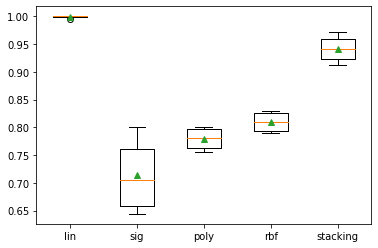

In [17]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()